# Ch03-1 k-최근접 이웃 회귀

## 1. 지도 학습 알고리즘 
    - 분류
        - 샘플을 몇 개의 클래스 중 하나로 분류하는 것
    - 회귀
        - 임의의 어떤 숫자를 예측하는 것 
        - 입력값(원인) 과 출력값(결과) 사이의 관계를 수학적으로 찾아내는 것.



**k-최근접 이웃 분류 알고리즘**

1. 예측하려는 샘플에 가장 가까운 샘플 k개 선택
2. 그 중 다수의 클래스로 새로운 샘플의 클래스를 예측


**k-최근접 이웃 회귀 알고리즘**

1. 예측하려는 샘플에 가장 가까운 샘플 k개 선택
2. 이웃한 샘플의 target 값의 평균값 = 샘플의 예측 target 값


### 데이터 준비
농어 길이가 있으면 무게 예측 가능할지도?


In [18]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


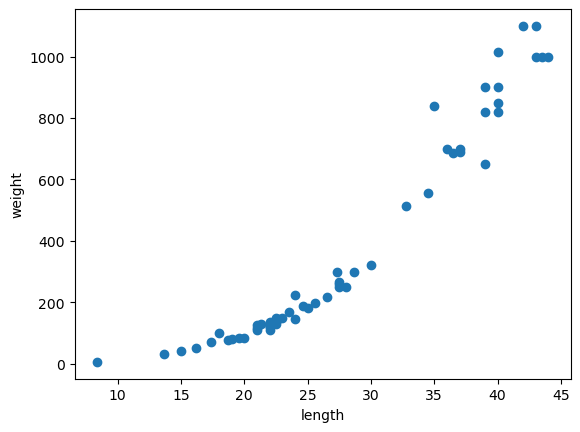

In [19]:
#산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 농어 길이가 커짐에 따라 무게가 늘어나는 것 확인

In [20]:
# 훈련 세트와 테스트 세트 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split ( 
    perch_length, perch_weight, random_state=42
)

In [21]:
#사이킷 런에 사용할 훈련 세트는 2차원 배열이어야 하므로 (3, ) 을 (3, 임의의 숫자)로 변경
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


### reshape() 사용 목적

머신러닝 모델 (예: scikit-learn의 k-최근접 이웃 등) 은
입력 데이터를 2차원 형태로 받습니다.
즉, (샘플 개수, 특성 개수) 형식이 필요해요.

따라서 train_input을 (42, 1)로 바꿔줘야 합니다.

42개의 샘플

각 샘플에 특성(feature)이 1개

In [22]:
#원소 4개인 1차원 배열을 2X2배열로 
print(test_array.shape)
test_array = test_array.reshape(2,2)

(4,)


### reshape() 메서드
배열의 형태를 변경

새배열 = 배열이름.reshape(새 행개수, 새 열개수)

### reshape(-1, 1)의 의미
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)


여기서 -1은 자동 계산(auto) 을 의미

즉, “남은 원소 개수에 맞게 자동으로 행(row) 개수를 정해줘” 라는 뜻

그래서

train_input의 원소가 42개 → (-1, 1) → (42, 1)

test_input의 원소가 14개 → (-1, 1) → (14, 1)
로 자동 변환

### shape과 reshape() 비교
shape은 현재 형태를 확인하는 속성 attribute
배열이름.shape <- 괄호 없이 사용



In [23]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정 계수 (R^2)

회귀 알고리즘 클래스 = KNeighborsRegressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
print(knr.score(test_input, test_target)) 
# 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율 
# 정확도

0.992809406101064


회귀에서는 1을 만드는 것이 거의 불가능
### 회귀의 평가 방법 "결정계수 coefficient of determination" = R^2
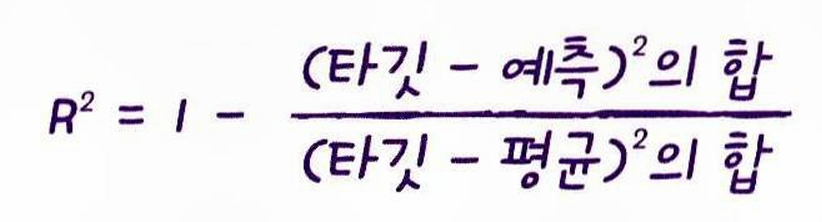
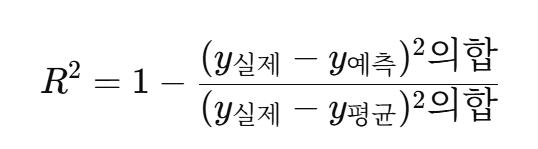

값의 범위: (-∞, 1]

1 → 완벽한 예측

0 → 예측이 단순히 평균을 말한 수준

음수 → 모델이 평균보다도 못한 예측
0 < 타깃의 평균 정도 < 타깃과 가까운 값 < 1

### 결정계수 코드
score = knr.score(X_test, y_test)

X_test: 입력 데이터 (test_input)
y_test: 실제 타깃 값 (test_target)
score: R² (결정계수)

In [26]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

# 19정도로 타깃과 다르다 


19.157142857142862


## 과대적합 vs 과소적합

### 과대적합 
- 훈련 세트 점수가 테스트 세트 점수보다 좋은 경우 
- 훈련 세트 > 테스트 세트 
- 훈련 세트에만 잘 맞는 모델이 만들어진 것

### 과소적합
- 훈련 세트보다 테스트 점수가 높거나, 둘 다 너무 낮은 경우
- 훈련 세트 < 테스트 세트
- 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우 

### 해결 방법
- 모델을 조금 더 복잡하게 만들기 
= k-최근접 이웃 알고리즘에서 이웃의 개수 k를 조금 줄이는 것
- 이웃의 개수가 줄어듦 -> 국지적인 패턴에 민감 
- 이웃의 개수가 늘어듦 -> 데이터 전반의 일반적인 패턴을 따르게 됨
- k-최근접 이웃의 기본k 값 = 5

In [27]:
# 훈련 세트의 R^2 점수
print(knr.score(train_input, train_target)) 


0.9698823289099254


In [28]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델 재훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

# k값을 줄였더니 r^2 높아짐

0.9804899950518966


In [29]:
print(knr.score(test_input, test_target))

# 훈련세트 >  테스트 점수  이면서 차이가 크지 않음

0.9746459963987609


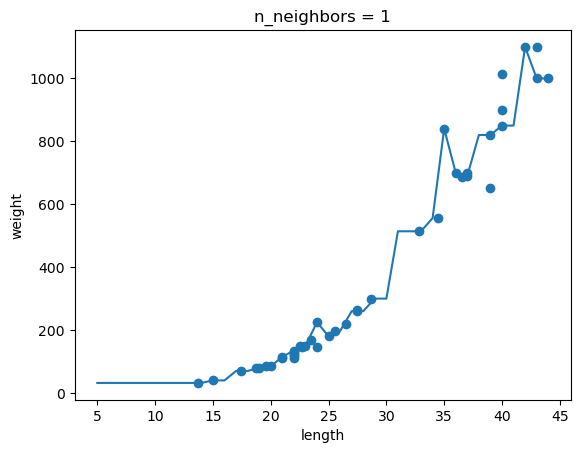

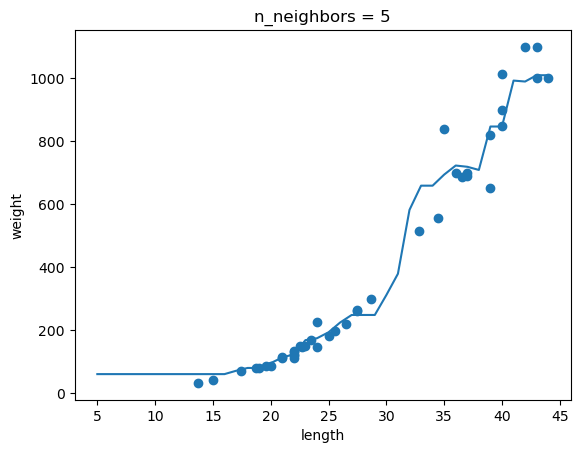

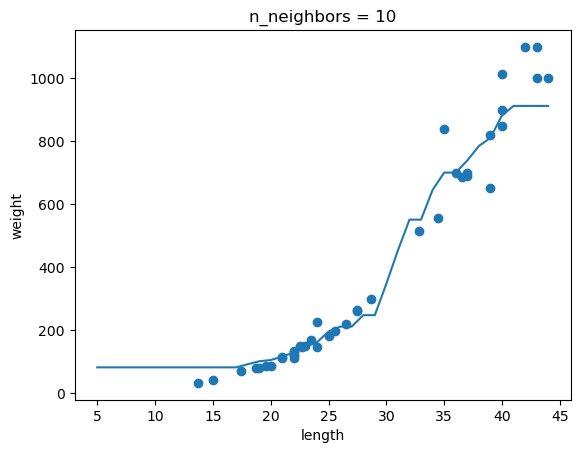

In [30]:
# 4번 문제

# k- 최근접 이웃 회귀 객체 만들기
knr = KNeighborsRegressor()

# 5에서 45까지 x 좌표 만들기
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그리기
for n in [1, 5, 10] :
        # 모델 훈련
        knr.n_neighbors = n
        knr.fit(train_input, train_target)

        # 지정한 범위 x 에 대한 예측을 구하기
        prediction = knr.predict(x)

        #훈련 세트와 예측 결과를 그래프로 그리기
        plt.scatter(train_input, train_target)
        plt.plot(x, prediction)
        plt.title('n_neighbors = {}'.format(n))
        plt.xlabel('length')
        plt.ylabel('weight')
        plt.show()

